### Merge shapefiles into a single multipolygon

In [1]:
import pandas as pd
import geopandas as gpd
import geoplot

In [2]:
# shapefiles from here: https://gadm.org/ 
gdf_china = gpd.read_file('/nfs/a68/earlacoa/shapefiles/china/CHN_adm1.shp')
gdf_hongkong = gpd.read_file('/nfs/a68/earlacoa/shapefiles/hongkong/gadm36_HKG_0.shp')
gdf_macao = gpd.read_file('/nfs/a68/earlacoa/shapefiles/macao/gadm36_MAC_0.shp')
gdf_taiwan = gpd.read_file('/nfs/a68/earlacoa/shapefiles/taiwan/gadm36_TWN_0.shp')

In [3]:
# for joining purposes, add the same tag
gdf_taiwan['ID_0'] = 49.0
gdf_hongkong['ID_0'] = 49.0
gdf_macao['ID_0'] = 49.0

In [4]:
# regions defined here: https://en.wikipedia.org/wiki/List_of_regions_of_China#People's_Republic_of_China
gdf_china_north = (
    gdf_china.loc[gdf_china['NAME_1'].isin(['Beijing', 'Tianjin', 'Hebei', 'Shanxi', 'Nei Mongol'])]
    .dissolve(by='ID_0')
)
gdf_china_north_east = (
    gdf_china.loc[gdf_china['NAME_1'].isin(['Liaoning', 'Jilin', 'Heilongjiang'])]
    .dissolve(by='ID_0')
)
gdf_china_east = (
    pd.concat([
        gdf_china.loc[gdf_china['NAME_1'].isin(['Shanghai', 'Jiangsu', 'Zhejiang', 'Anhui', 'Fujian', 'Jiangxi', 'Shandong'])], 
        gdf_taiwan
    ])
    .pipe(gpd.GeoDataFrame)
    .dissolve(by='ID_0')
)
gdf_china_south_central = (
    pd.concat([
        gdf_china.loc[gdf_china['NAME_1'].isin(['Henan', 'Hubei', 'Hunan', 'Guangdong', 'Guangxi', 'Hainan'])], 
        gdf_hongkong,
        gdf_macao
    ])
    .pipe(gpd.GeoDataFrame)
    .dissolve(by='ID_0')
)
gdf_china_south_west = gdf_china.loc[gdf_china['NAME_1'].isin(['Chongqing', 'Sichuan', 'Guizhou', 'Yunnan', 'Xizang'])].dissolve(by='ID_0')
gdf_china_north_west = gdf_china.loc[gdf_china['NAME_1'].isin(['Shaanxi', 'Gansu', 'Qinghai', 'Ningxia Hui', 'Xinjiang Uygur'])].dissolve(by='ID_0')

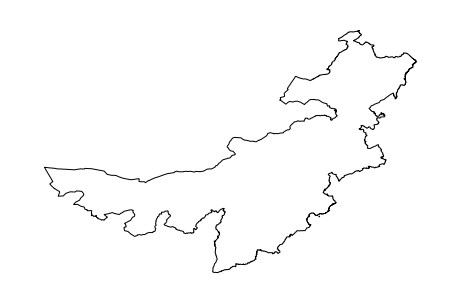

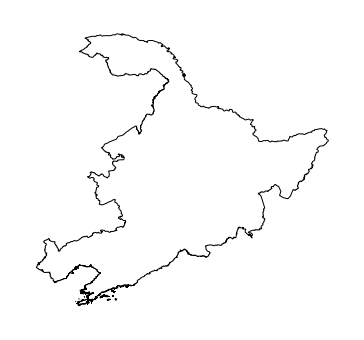

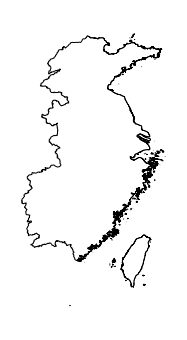

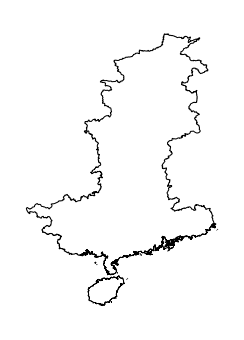

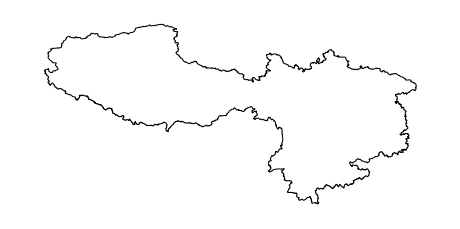

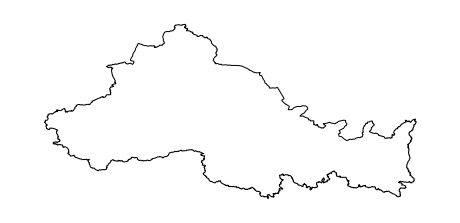

In [5]:
geoplot.polyplot(gdf_china_north)
geoplot.polyplot(gdf_china_north_east)
geoplot.polyplot(gdf_china_east)
geoplot.polyplot(gdf_china_south_central)
geoplot.polyplot(gdf_china_south_west)
geoplot.polyplot(gdf_china_north_west)

In [114]:
gdf_china_north.to_file('/nfs/a68/earlacoa/shapefiles/china/CHN_north.shp')
gdf_china_north_east.to_file('/nfs/a68/earlacoa/shapefiles/china/CHN_north_east.shp')
gdf_china_east.to_file('/nfs/a68/earlacoa/shapefiles/china/CHN_east.shp')
gdf_china_south_central.to_file('/nfs/a68/earlacoa/shapefiles/china/CHN_south_central.shp')
gdf_china_south_west.to_file('/nfs/a68/earlacoa/shapefiles/china/CHN_south_west.shp')
gdf_china_north_west.to_file('/nfs/a68/earlacoa/shapefiles/china/CHN_north_west.shp')